
## CSE 351 Project 4: World Happiness
#### Eric Fan, Jerry Xiao, Robert Buthorn

<font size = 3>
Made with Python 3 on Google Colab

Required Libraries:
* pandas
* matplotlib
* seaborn
* numpy
* sklearn

 </font>

#EDA

In [16]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# read all csv files in world_happiness folder, and add a column indicating year
df_2015 = pd.read_csv('2015.csv').assign(Year=2015)
df_2015 = df_2015.drop('Standard Error',axis=1)
df_2015=df_2015.drop('Dystopia Residual',axis=1)
df_2015= df_2015.drop('Region',axis=1)
df_2015.columns=['Country','Rank','Score','GDP/Capita','Family','Healthy Life Expectancy','Freedom','Government Corruption','Generosity','Year']

##print(df_2015)
df_2016 = pd.read_csv('2016.csv').assign(Year=2016)
df_2016=df_2016.drop('Region',axis=1)
df_2016=df_2016.drop('Dystopia Residual',axis=1)
df_2016 = df_2016.drop('Lower Confidence Interval',axis=1)
df_2016= df_2016.drop('Upper Confidence Interval', axis=1)
df_2016.columns=['Country','Rank','Score','GDP/Capita','Family','Healthy Life Expectancy','Freedom','Government Corruption','Generosity','Year']

df_2017 = pd.read_csv('2017.csv').assign(Year=2017)
df_2017=df_2017.drop('Whisker.high',axis=1)
df_2017=df_2017.drop('Dystopia.Residual',axis=1)
df_2017=df_2017.drop('Whisker.low',axis=1)
df_2017= df_2017[['Country','Happiness.Rank','Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.','Freedom','Trust..Government.Corruption.','Generosity','Year']]
df_2017.columns=['Country','Rank','Score','GDP/Capita','Family','Healthy Life Expectancy','Freedom','Government Corruption','Generosity','Year']
##print(df_2017)

df_2018 = pd.read_csv('2018.csv').assign(Year=2018)
df_2018.columns=['Rank','Country','Score','GDP/Capita','Family','Healthy Life Expectancy','Freedom','Generosity','Government Corruption','Year']
df_2018=df_2018[['Country','Rank','Score','GDP/Capita','Family','Healthy Life Expectancy','Freedom','Government Corruption','Generosity','Year']]
##print(df_2018)

df_2019 = pd.read_csv('2019.csv').assign(Year=2019)
df_2019.columns=['Rank','Country','Score','GDP/Capita','Family','Healthy Life Expectancy','Freedom','Generosity','Government Corruption','Year']
df_2019=df_2019[['Country','Rank','Score','GDP/Capita','Family','Healthy Life Expectancy','Freedom','Government Corruption','Generosity','Year']]
##print(df_2019)

# merge all dataframes into one
df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], axis = 0,ignore_index=True)
# clean the data, remove any rows with empty values
df = df.dropna()

print(df)




                      Country  Rank  Score  GDP/Capita   Family  \
0                 Switzerland     1  7.587     1.39651  1.34951   
1                     Iceland     2  7.561     1.30232  1.40223   
2                     Denmark     3  7.527     1.32548  1.36058   
3                      Norway     4  7.522     1.45900  1.33095   
4                      Canada     5  7.427     1.32629  1.32261   
..                        ...   ...    ...         ...      ...   
777                    Rwanda   152  3.334     0.35900  0.71100   
778                  Tanzania   153  3.231     0.47600  0.88500   
779               Afghanistan   154  3.203     0.35000  0.51700   
780  Central African Republic   155  3.083     0.02600  0.00000   
781               South Sudan   156  2.853     0.30600  0.57500   

     Healthy Life Expectancy  Freedom  Government Corruption  Generosity  Year  
0                    0.94143  0.66557                0.41978     0.29678  2015  
1                    0.94784  0.6

Here we merged the data for all 5 years, renaming the columns to match between the data. Any rows with empty values were removed. We also removed columns that were not consistent across the files such as `Standard Error`, `Dystopia Residual`, `Region` and more.

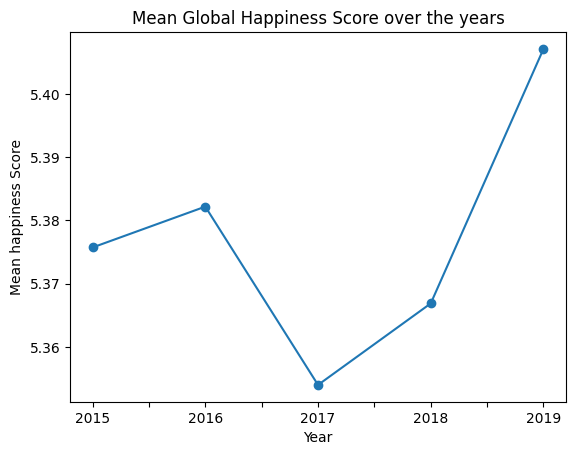

In [18]:
# average worldwide happiness by year
year_means = df.groupby('Year')['Score'].mean()
year_means.index = year_means.index.astype(int).astype(str)

year_means.plot(kind='line',marker = 'o')
plt.xlabel('Year')
plt.ylabel('Mean happiness Score')
plt.title('Mean Global Happiness Score over the years')
plt.show()


The Mean Global Happiness Score increased from 2015 to 2016, decreased in 2017 and increased from 2018 and after.

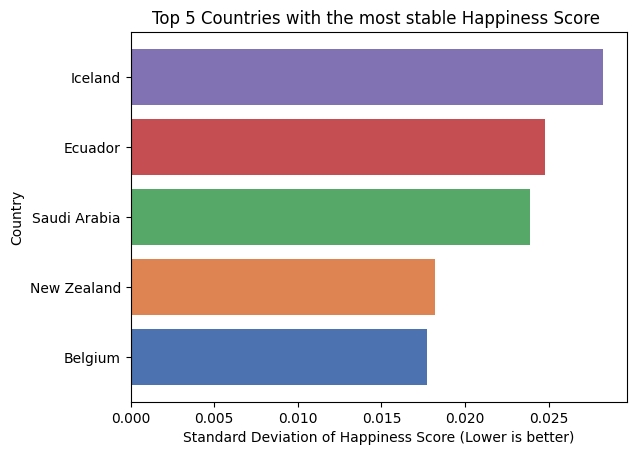

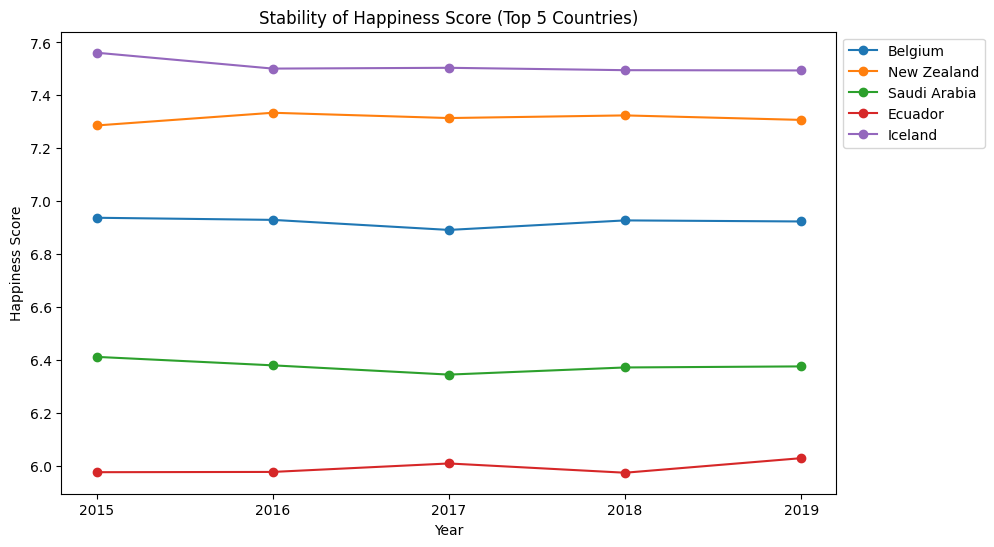

In [19]:
# filter for only countries in all 5 years
country_counts = df.groupby('Country')['Year'].nunique()
selected_countries = country_counts[country_counts == 5].index.tolist()
filtered_df = df[df['Country'].isin(selected_countries)]

# choose lowest 10 country's standard deviation
std_dev_score = filtered_df.groupby('Country')['Score'].std().reset_index()
sorted_countries = std_dev_score.sort_values('Score')
top_countries = sorted_countries.head(5)

# colors
num_colors = 5
color_palette = sns.color_palette('deep', num_colors)

# bar plot
plt.barh(top_countries['Country'], top_countries['Score'], color= color_palette)
plt.xlabel('Standard Deviation of Happiness Score (Lower is better)')
plt.ylabel('Country')
plt.title('Top 5 Countries with the most stable Happiness Score ')
plt.show()

# line graph to visualize changes in happiness
plt.figure(figsize=(10, 6))
for country in top_countries['Country']:
    country_data = filtered_df[filtered_df['Country'] == country]
    plt.plot(country_data['Year'].astype(int).astype(str), country_data['Score'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Stability of Happiness Score (Top 5 Countries)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()


To find stability of a countries Happiness Score, we calculated the standard deviation of a country's happiness score across the 5 years given. These 5 countries have the most stablility (lowest STD) out of all countries with their Happiness Score, with Belgium being the most stable.

In addition, this line chart shows of the happiness score over time of those countries. Notice how the lines are very flat, indicating stablity.

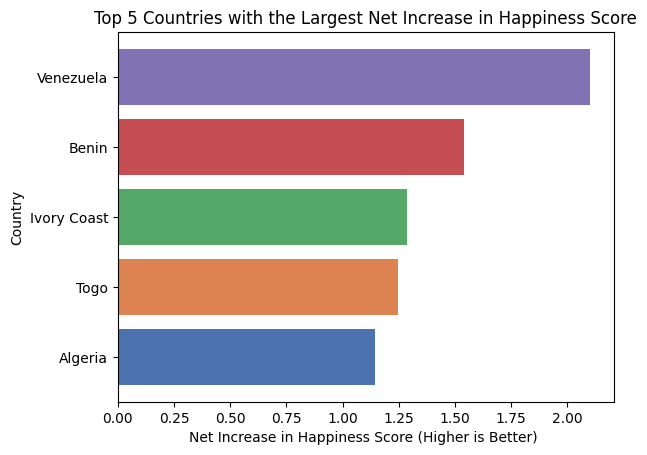

         Country  Net Increase
2        Algeria         1.144
152         Togo         1.246
69   Ivory Coast         1.289
14         Benin         1.543
165    Venezuela         2.103


In [20]:
# Calculate the net positive increase
net_increase = df.groupby('Country')['Score'].apply(lambda x: x.max() - x.min()).reset_index()
net_increase.columns = ['Country', 'Net Increase']

sorted_countries = net_increase.sort_values('Net Increase', ascending=False)
top_countries = sorted_countries.head(5)
top_countries = top_countries[::-1]

# colors
num_colors = 5
color_palette = sns.color_palette('deep', num_colors)

# Bar plot
plt.barh(top_countries['Country'], top_countries['Net Increase'], color=color_palette)
plt.xlabel('Net Increase in Happiness Score (Higher is Better) ')
plt.ylabel('Country')
plt.title('Top 5 Countries with the Largest Net Increase in Happiness Score')
plt.show()

print(top_countries)

This chart shows the top 5 countries with the largest overall increase in their Happiness Score from 2015 to 2019. Venezuela had the largest increase of 2.013, followed by Benin with an increase of 1.543 and the Ivory Coast with 1.289.

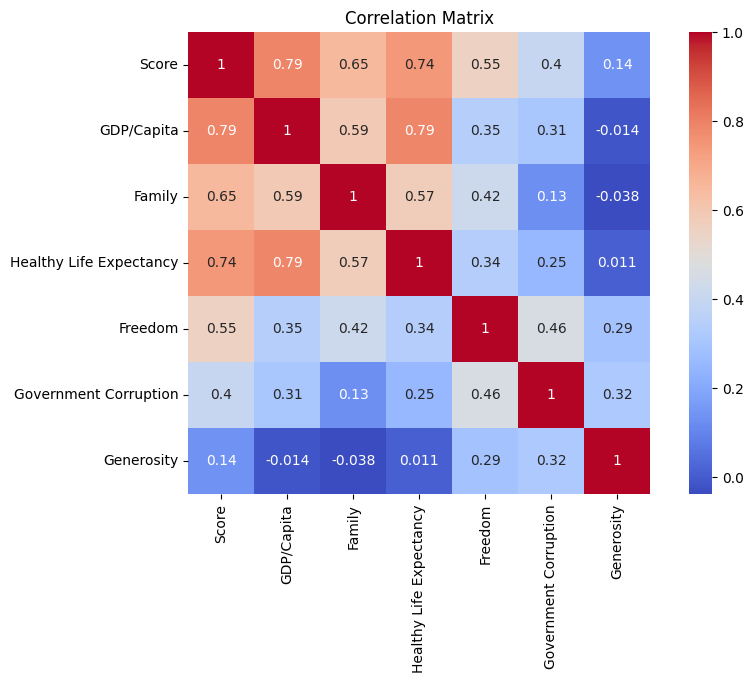

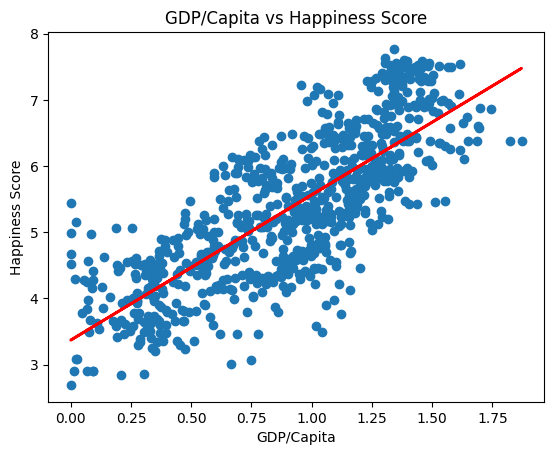

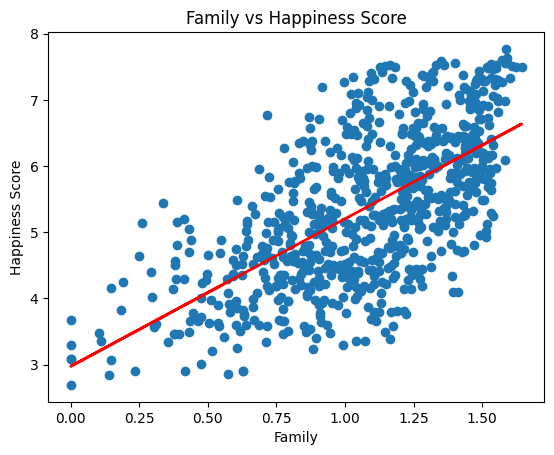

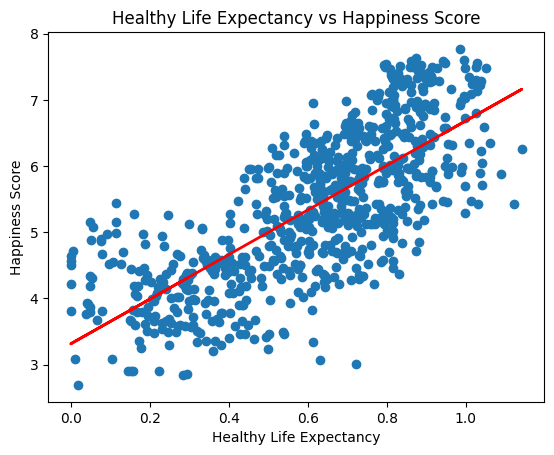

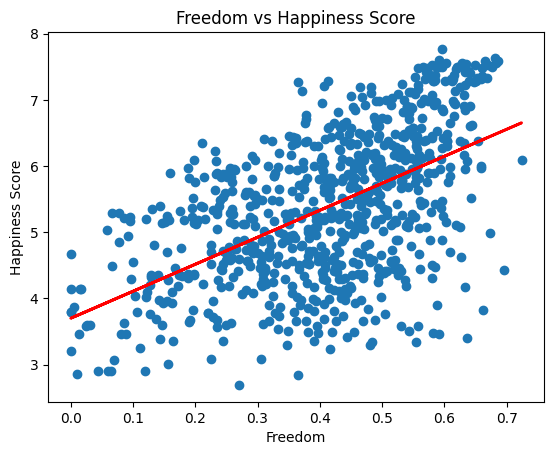

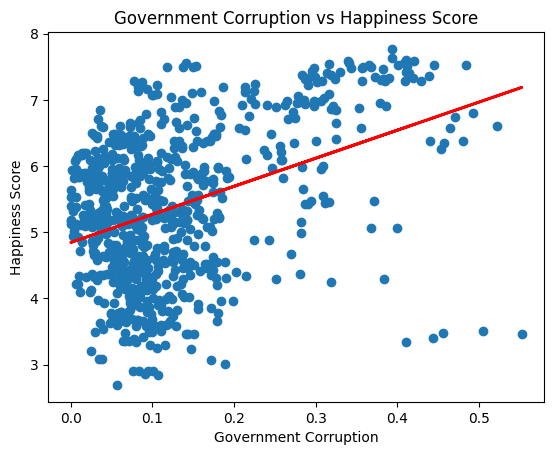

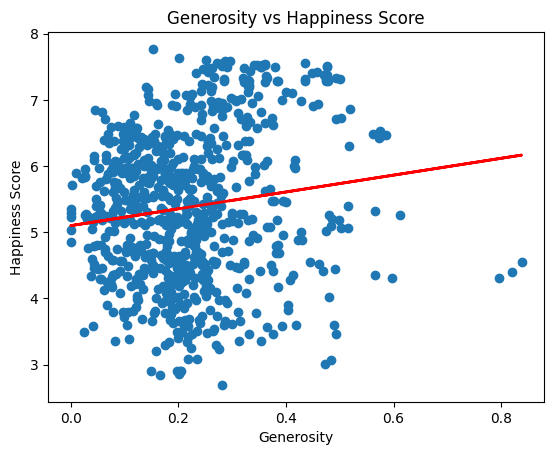

In [21]:
# select columns
columns_of_interest = ['Score', 'GDP/Capita','Family','Healthy Life Expectancy','Freedom','Government Corruption','Generosity']
filtered_df = df[columns_of_interest]

# heatmap
correlation_matrix = filtered_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


# linear regression
for column in columns_of_interest[1:]:
    x = df[column]
    y = df['Score']
    m, b = np.polyfit(x, y, 1)
    line_fit = m * x + b

    # scatter plot with line of best fit
    plt.figure()
    plt.scatter(x, y)
    plt.plot(x, line_fit, color='red', linewidth=2)
    plt.xlabel(column)
    plt.ylabel('Happiness Score')
    plt.title(f'{column} vs Happiness Score')
    plt.show()

This is the heatmap of all the variables and their respective correlation values. All of the variables have a postitive correlation with a countries happiness score, with `GPD/Capita` having the highest correlation followed by `Healthy Life Expectancy` and `Family`.

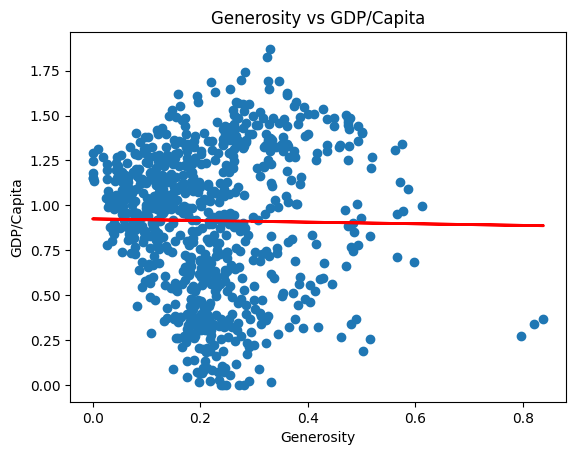

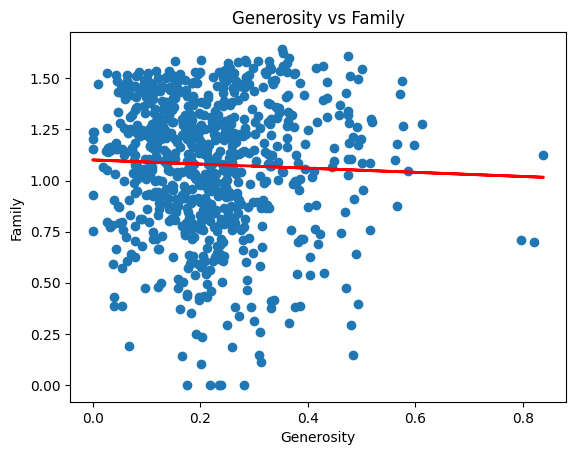

In [22]:
# GPD/Capitial vs generosity and family
chosen_columns = ['GDP/Capita', 'Family']

for column in chosen_columns:
  x = df['Generosity']
  y = df[column]
  m, b = np.polyfit(x, y,1)
  line_fit = m * x + b

  # scatter plot with line of best fit
  plt.figure()
  plt.scatter(x,y)
  plt.plot(x, line_fit, color = 'red', linewidth=2)
  plt.xlabel('Generosity')
  plt.ylabel(column)
  plt.title(f'Generosity vs {column}')
  plt.show()



#Modeling and Question Answering

The first model is linear regression. The formula for this model is `y = b0 + b1*x1 + b2*x2 + ... + bn*xn + e`

The goal of the linear regression is to estimate the coefficients of the regression through minimizing the sum of the squared errors. These coefficients are represented as weights given to the variable based on how important they are in determining the target variable, in this case happiness score in 2019.

- Each year for each country is a separate entry to train the model on
- Train the model on 2015-2018 data and test the model on 2019 data
- The training variables will be some of the columns of the dataset, namely:
`Score`, `GDP/Capita`,`Family`,`Healthy Life Expectancy`,`Freedom`,`Government Corruption`, `Generosity` and `Year`.
- The target variable is happiness score in 2019
- We need to drop the country name and ranking as these are not needed for these models. Ranking is highly correlated with score, so we must drop it
- Country names are unnecessary and can be extracted based on the position of the outputs of the model.

MODEL 1:

R^2 SCORE:
0.7683792447677573

COEF MATRIX:
{'GDP/capita': 1.085699212534852, 'family/healthy': 0.8178782651505849, 'life expectancy': 1.0189281933487508, 'freedom': 1.4366979128643682, 'government corruption': 0.7850069171758087, 'generosity': 0.4433577227987135, 'year': -0.09864753183966993}


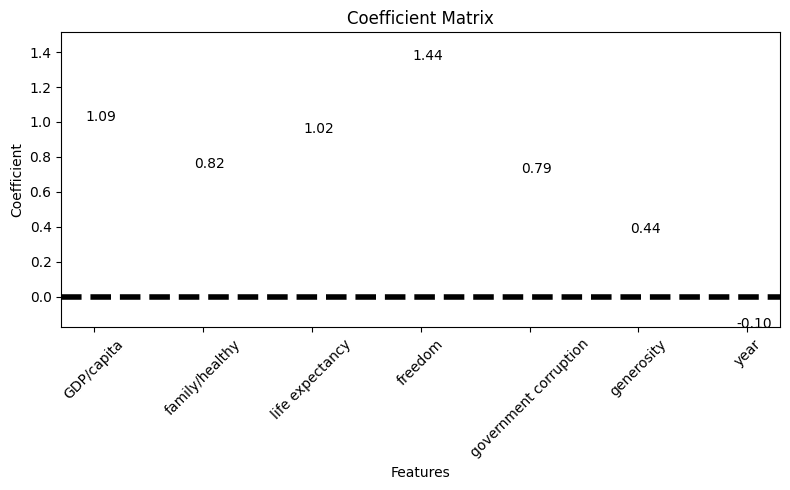

In [23]:
features = ['GDP/capita', 'family/healthy', 'life expectancy', 'freedom', 'government corruption', 'generosity', 'year']

model1_df = df.copy()
model1_df = model1_df.drop("Country", axis = 1)
model1_df = model1_df.drop("Rank", axis = 1)

train_data = model1_df[model1_df['Year'] != 2019]
test_data = model1_df[model1_df['Year'] == 2019]

trainX = train_data.drop(['Score'], axis=1)
trainY = train_data['Score']
testX = test_data.drop(['Score'], axis=1)
testY = test_data['Score']

model1 = LinearRegression()
model1.fit(trainX, trainY)

model1_pred = model1.predict(testX)

print("MODEL 1:\n")

print("R^2 SCORE:")
print(r2_score(testY, model1_pred))

print("\nCOEF MATRIX:")
coef_dict = {feature: value for feature, value in zip(features, model1.coef_)}
print(coef_dict)

# Create a DataFrame for coefficient and variable names
coef_df = pd.DataFrame({'varname': features, 'coef': model1.coef_})

# Plot the scatter plot with annotations
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='scatter', ax=ax, color='none', s=120)
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)

# Add annotations to the scatter plot
for i, row in coef_df.iterrows():
    ax.annotate(f'{row["coef"]:.2f}', (i, row["coef"]), xytext=(5, -10), textcoords='offset points', ha='center')

# Customize the plot
ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Coefficient Matrix')

plt.xticks(range(len(features)), features, rotation=45)
plt.tight_layout()
plt.show()

It appears that actually including the Year as an input variable to the model helped it become more accurate, with an `R^2` of `.77` rather than `.75`. This is a miniscule difference, but a positive improvement nonetheless. This inidicates that, most likely, the year it is has some correlation with the happiness score overall. This model was the best of the three, with an `R^2` score of around `.77`. This is decent in most cases but in terms of a predictor of happiness score, it cannot be very accurate much of the time.


For the second model, we are using a Ridge regression, which is an extension of the linear regression. The formula is the same as linear regression, except that a regularization term is added to the minimized objective function, which
reduces the complexity of the model.

We implemented multiple different alpha values for this regression, but none seemed to be as good as the default. The alpha value determines the complexity or fitting ability of the model. Too big, and the model may be underfit. Too small and the model may be overfit.

In [24]:
train_data2 = model1_df[model1_df['Year'] != 2019]
test_data2 = model1_df[model1_df['Year'] == 2019]

trainX2 = train_data2.drop(['Score'], axis=1)
trainY2 = train_data2['Score']
testX2 = test_data2.drop(['Score'], axis=1)
testY2 = test_data2['Score']

model2 = Ridge(alpha=1)
model2.fit(trainX2, trainY2)

model2_pred = model2.predict(testX2)

print("\n\nMODEL 2:\n")

print("R^2 SCORE:")
print(r2_score(testY2, model2_pred))

print("\nMEAN SQUARED ERROR:")
print(mean_squared_error(testY2, model2_pred))

print("\nCOEF MATRIX:")
coef_dict = {feature: value for feature, value in zip(features, model2.coef_)}
print(coef_dict)



MODEL 2:

R^2 SCORE:
0.7676677661267983

MEAN SQUARED ERROR:
0.2860226576237697

COEF MATRIX:
{'GDP/capita': 1.0976606760179328, 'family/healthy': 0.8262033163186248, 'life expectancy': 0.9936114059483973, 'freedom': 1.3593032259972277, 'government corruption': 0.7331067878187678, 'generosity': 0.44234181950816764, 'year': -0.09952687705530561}


This model was the second best of the three by only a marginal amount. The `R^2` value was around `.77`, and overall has the standard of prediction power as the first model.

For model 3, we used a decision tree regressor. This type of model splits the data recursively at one of the features, and records the purity of the resulting subset of data. The model tries to choose the best feature to split the data at at all steps of the recursion by typically using the mean squared error, a measure of distance between the predicted and actual values.

In [25]:
train_data3 = model1_df[model1_df['Year'] != 2019]
test_data3 = model1_df[model1_df['Year'] == 2019]

trainX3 = train_data3.drop(['Score'], axis=1)
trainY3 = train_data3['Score']
testX3 = test_data3.drop(['Score'], axis=1)
testY3 = test_data3['Score']

model3 = DecisionTreeRegressor()
model3.fit(trainX3, trainY3)

model3_pred = model3.predict(testX3)

print("\n\nMODEL 3:\n")

print("R^2 SCORE:")
print(r2_score(testY3, model3_pred))

print("\nMEAN SQUARED ERROR:")
print(mean_squared_error(testY3, model3_pred))

values = model3.feature_importances_
print("\nFEATURES+IMPORTANCES:")
for feature, value in zip(features, values):
    print(f"{feature}: {value}")



MODEL 3:

R^2 SCORE:
0.38798080825713677

MEAN SQUARED ERROR:
0.7534527293986326

FEATURES+IMPORTANCES:
GDP/capita: 0.5141829360827966
family/healthy: 0.05531811570036903
life expectancy: 0.21011239149195815
freedom: 0.156295430914664
government corruption: 0.029183222804584196
generosity: 0.032572185850378896
year: 0.0023357171552489155


This model was particularly bad and completely unusable. We were not entirely sure why but we speculated that it has to do with the limited computing power needed for the decision tree regression, or the recursive strategy of the regression.

Whatever the issue was, the other two models make for far more useful predictors than this one.


In [26]:
coef_model1 = {'GDP/capita': 1.085699212534852, 'family/healthy': 0.8178782651505849, 'life expectancy': 1.0189281933487508, 'freedom': 1.4366979128643682, 'government corruption': 0.7850069171758087, 'generosity': 0.4433577227987135, 'year': -0.09864753183966993}
mse_model1 = 0.2851467610323364
r2_model1 = 0.7683792447677573

coef_model2 = {'GDP/capita': 1.0976606760179328, 'family/healthy': 0.8262033163186248, 'life expectancy': 0.9936114059483973, 'freedom': 1.3593032259972277, 'government corruption': 0.7331067878187678, 'generosity': 0.44234181950816764, 'year': -0.09952687705530561}
mse_model2 = 0.2860226576237697
r2_model2 = 0.7676677661267983

coef_model3 = {'GDP/capita': 0.5144676764191782, 'family/healthy': 0.05902792813696849, 'life expectancy': 0.20812737494294264, 'freedom': 0.15012076745820102, 'government corruption': 0.02945627701638066, 'generosity': 0.03505494206591356, 'year': 0.003745033960415393}
mse_model3 = 0.7673326770022019
r2_model3 = 0.3767063195170802

rm1 = r2_model1/mse_model1
rm2 = r2_model2/mse_model2
rm3 = r2_model3/mse_model3
rmtotal = rm1+rm2+rm3

GDP_capita = (rm1*coef_model1['GDP/capita']+rm2*coef_model2['GDP/capita']+rm3*coef_model3['GDP/capita'])/(rmtotal)
family = (rm1*coef_model1['family/healthy']+rm2*coef_model2['family/healthy']+rm3*coef_model3['family/healthy'])/(rmtotal)
healthy_life_expectancy = (rm1*coef_model1['life expectancy']+rm2*coef_model2['life expectancy']+rm3*coef_model3['life expectancy'])/(rmtotal)
freedom = (rm1*coef_model1['freedom']+rm2*coef_model2['freedom']+rm3*coef_model3['freedom'])/(rmtotal)
corruption = (rm1*coef_model1['government corruption']+rm2*coef_model2['government corruption']+rm3*coef_model3['government corruption'])/(rmtotal)
generosity = (rm1*coef_model1['generosity']+rm2*coef_model2['generosity']+rm3*coef_model3['generosity'])/(rmtotal)
year = (rm1*coef_model1['year']+rm2*coef_model2['year']+rm3*coef_model3['year'])/(rmtotal)

eqcoeff = [GDP_capita,family,healthy_life_expectancy,freedom,corruption,generosity,year]
eqnames = ["GDP","family","life expectancy","freedom","trust","generosity","year"]

equation = "Happiness = "
for i in range (len(eqcoeff)):
  if eqcoeff[i]>=0:
    equation += "+"+str(eqcoeff[i])+"*"+eqnames[i]
  else:
    equation += str(eqcoeff[i])+"*"+eqnames[i]
print(equation)

Happiness = +1.043390923898569*GDP+0.7582147214191127*family+0.9395362683032017*life expectancy+1.2936986134467805*freedom+0.6980804863003068*trust+0.40874271040720056*generosity-0.09048550383332112*year


Considering coefficients generated by each 3 models, we weighted them based on accuracy of the models given by `r^2` and `MSE` metrics. We did this by weighting each coefficient given by their respective model named `x`, by a scale of `(r_x^2/MSE_x^2)`, and getting their final coefficients. Above are the results.